In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [2]:
def get_ps_tsm_dataframes_csv(file_pattern: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Get the dataframes for the PS and TSM data from the files that match the pattern.
    """
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)

    df_ps, df_tsm = split_dataframe(df)
    
    return df_ps, df_tsm

def split_dataframe(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_ps = df[df['type'] == 'ps'].reset_index(drop=True)
    df_tsm = df[df['type'] == 'tsm'].reset_index(drop=True)
    
    return df_ps, df_tsm

def get_dataframe_csv(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

def get_dataframe_csv_no_header(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file, header=None)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

### STOI

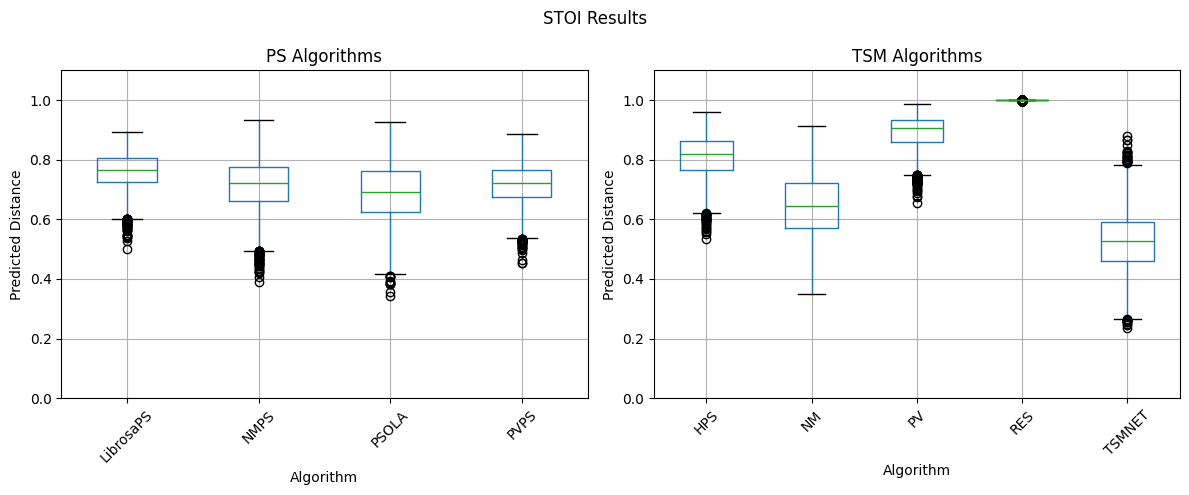

In [3]:
df_stoi_ps, df_stoi_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/stoi/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_stoi_ps.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Predicted Distance')
axes[0].set_ylim(0, 1.1)

# Boxplot for df_tsm
df_stoi_tsm.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Predicted Distance')
axes[1].set_ylim(0, 1.1)

# Set the main title
fig.suptitle("STOI Results")

plt.tight_layout()
plt.show()

### SISNR

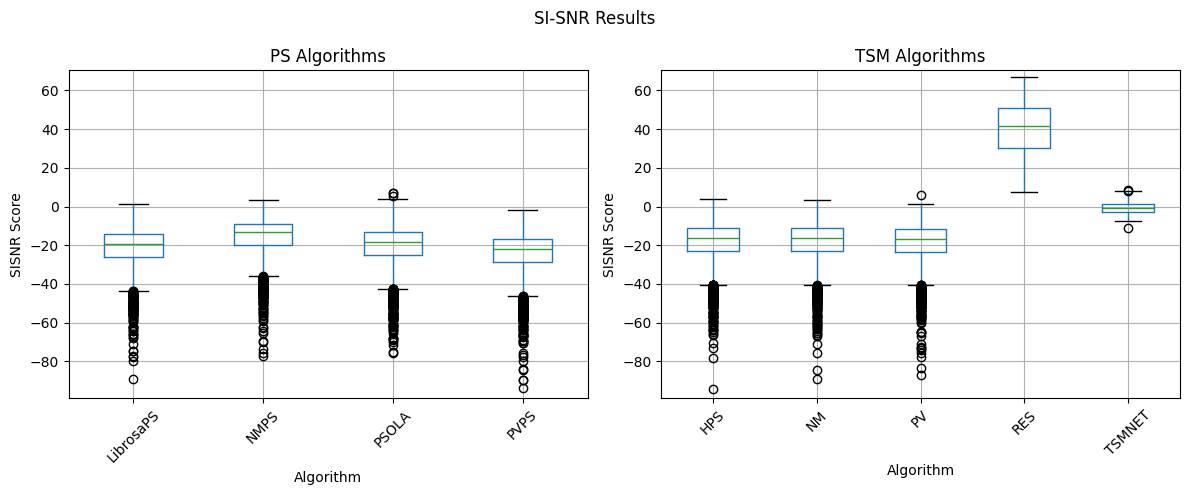

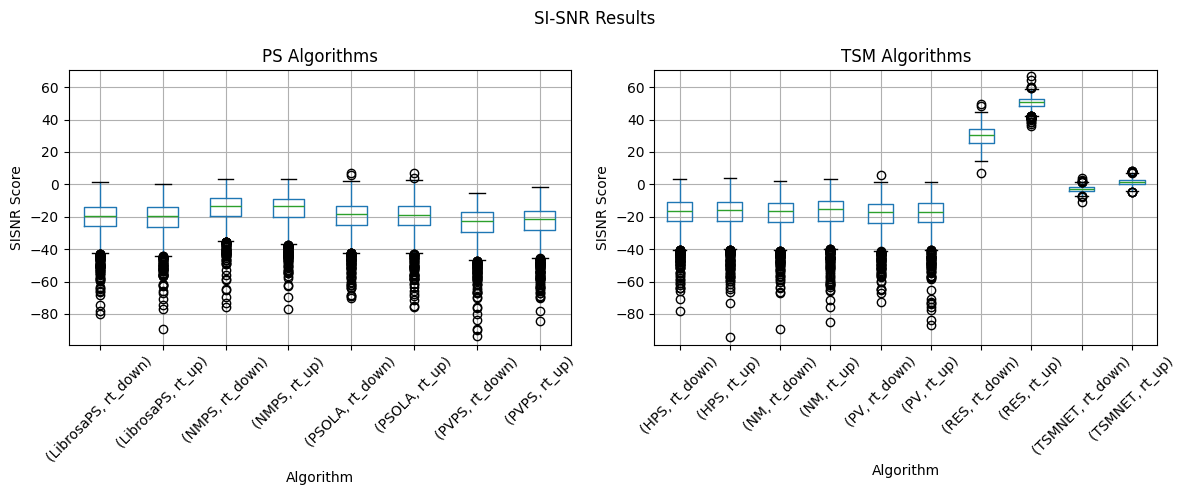

In [4]:
df_sisnr_ps, df_sisnr_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/sisnr/*.csv")

def plot_sisnr_results(df_ps: pd.DataFrame, df_tsm: pd.DataFrame, groupby = 'algo') -> None:
    """
    Plot the SISNR results for PS and TSM algorithms.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot for df_ps
    df_ps.boxplot(by=groupby, column='sisnr_score', rot=45, ax=axes[0])
    axes[0].set_title('PS Algorithms')
    axes[0].set_xlabel('Algorithm')
    axes[0].set_ylabel('SISNR Score')

    # Boxplot for df_tsm
    df_tsm.boxplot(by=groupby, column='sisnr_score', rot=45, ax=axes[1])
    axes[1].set_title('TSM Algorithms')
    axes[1].set_xlabel('Algorithm')
    axes[1].set_ylabel('SISNR Score')

    # Set the same y-axis range for both plots
    y_min = min(df_ps['sisnr_score'].min(), df_tsm['sisnr_score'].min())
    y_max = max(df_ps['sisnr_score'].max(), df_tsm['sisnr_score'].max())
    axes[0].set_ylim(y_min * 1.05, y_max * 1.05)
    axes[1].set_ylim(y_min * 1.05, y_max * 1.05)

    # Set the main title
    fig.suptitle("SI-SNR Results")

    plt.tight_layout()
    plt.show()

plot_sisnr_results(df_sisnr_ps, df_sisnr_tsm)
plot_sisnr_results(df_sisnr_ps, df_sisnr_tsm, groupby=["algo", "factor"])

### PESQ

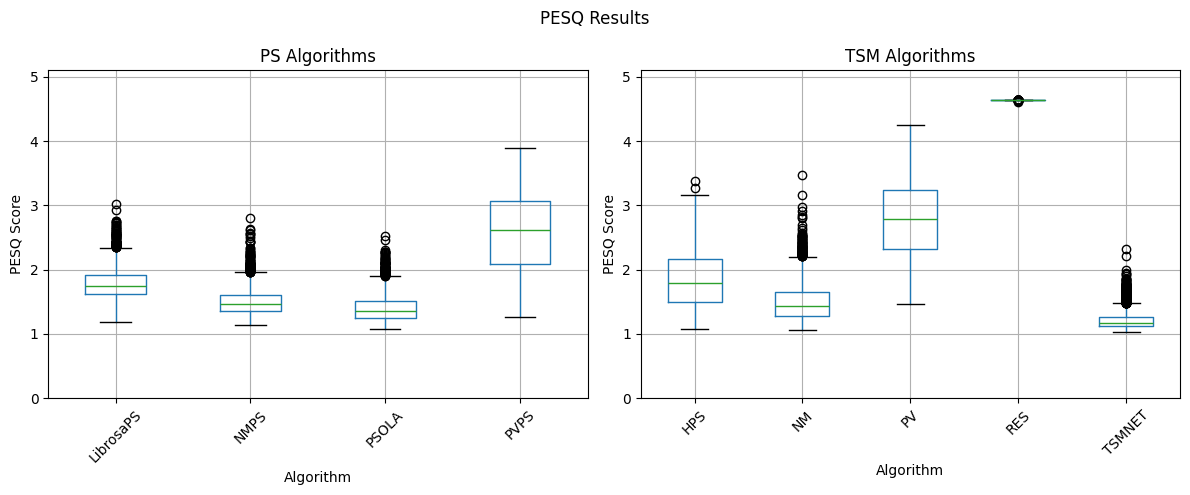

In [5]:
df_pesq_ps, df_pesq_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/pesq/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_pesq_ps.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('PESQ Score')
axes[0].set_ylim(0, 5.1)

# Boxplot for df_tsm
df_pesq_tsm.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('PESQ Score')
axes[1].set_ylim(0, 5.1)

# Set the main title
fig.suptitle("PESQ Results")

plt.tight_layout()
plt.show()

### NISQA

In [7]:
df_nisqa_tts = get_dataframe_csv("evaluation/objective/nisqa/tts/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_tts['type'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[3])
df_nisqa_tts['algo'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[4])
df_nisqa_tts['factor'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[5])

df_nisqa_tts_ps, df_nisqa_tts_tsm = split_dataframe(df_nisqa_tts)

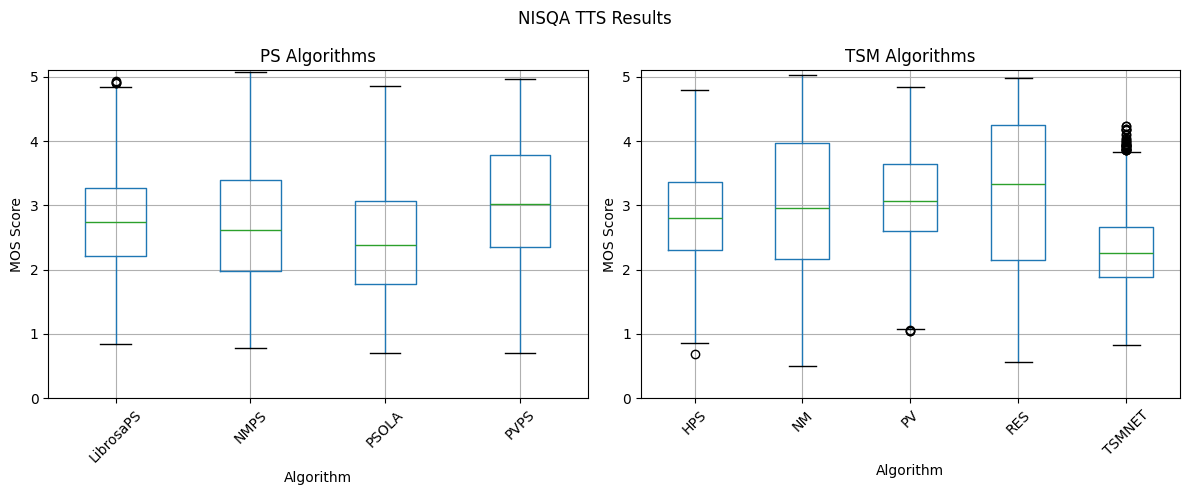

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_nisqa_tts_ps.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('MOS Score')
axes[0].set_ylim(0, 5.1)

# Boxplot for df_tsm
df_nisqa_tts_tsm.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('MOS Score')
axes[1].set_ylim(0, 5.1)

# Set the main title
fig.suptitle("NISQA TTS Results")

plt.tight_layout()
plt.show()

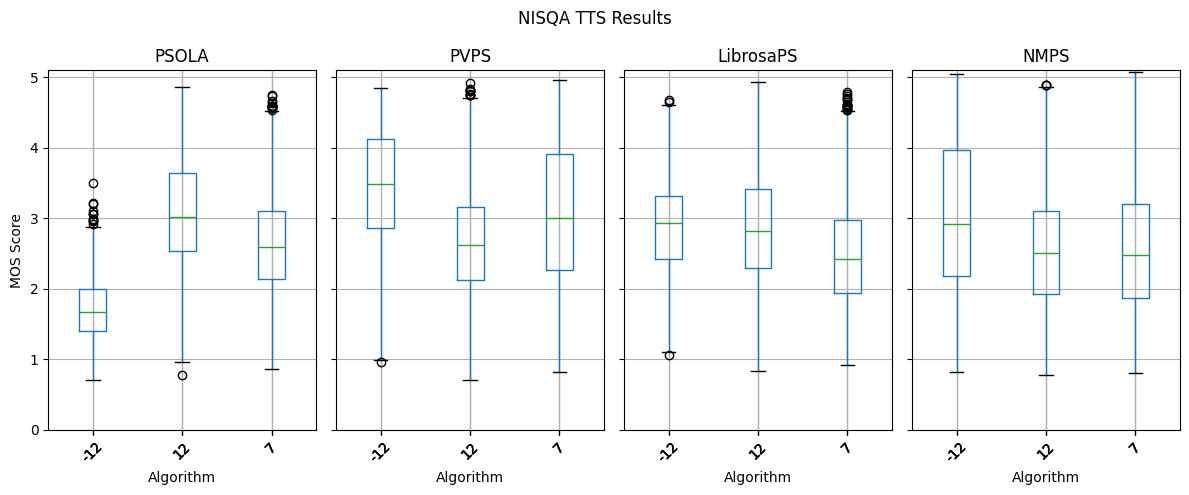

In [ ]:
df_nisqa_tts_ps

fig, axes = plt.subplots(1, 4, figsize=(12, 5), sharey=True, sharex=True)

# Boxplot for df_ps
for i, algo in enumerate(df_nisqa_tts_ps['algo'].unique()):
    df_tmp = df_nisqa_tts_ps[df_nisqa_tts_ps['algo'] == algo].boxplot(column='mos_pred', by='factor', rot=45, ax=axes[i])
    axes[i].set_title(algo)
    axes[i].set_xlabel('Algorithm')
    axes[0].set_ylabel('MOS Score')
    axes[i].set_ylim(0, 5.1)
# Set the main title
fig.suptitle("NISQA TTS Results")

plt.tight_layout()
plt.show()

In [9]:
df_nisqa_std = get_dataframe_csv("evaluation/objective/nisqa/std/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_std['type'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[3])
df_nisqa_std['algo'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[4])
df_nisqa_std['factor'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[5])

df_nisqa_std_ps, df_nisqa_std_tsm = split_dataframe(df_nisqa_std)

/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_17036/2045258531.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_17036/2045258531.py:12: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])


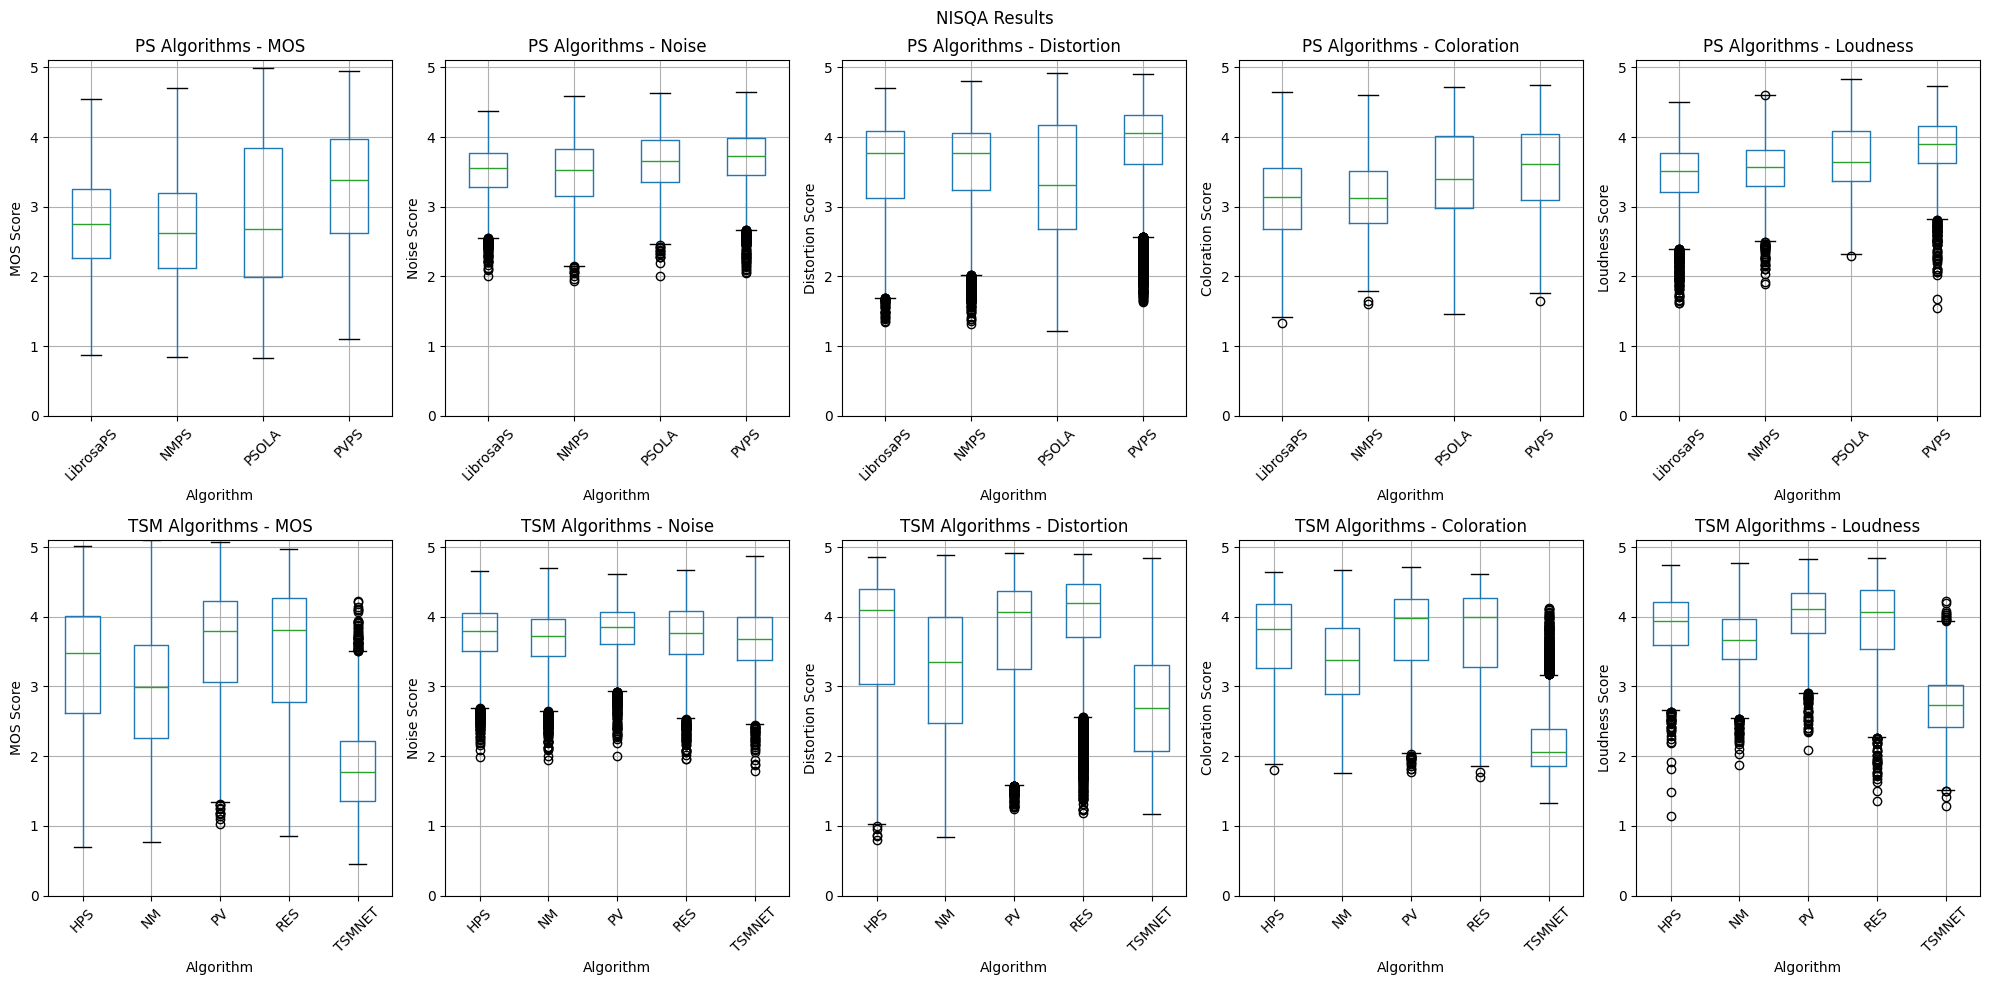

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Boxplots for df_ps
df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
for ax, metric in zip(axes[0], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(0., 5.1)

# Boxplots for df_tsm
df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])
for ax, metric in zip(axes[1], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(0., 5.1)

# Set the main title
fig.suptitle("NISQA Results")

plt.tight_layout()
plt.show()

### Audio Aesthetics

In [11]:
df_aa = pd.DataFrame({}) 
for file in glob.iglob("evaluation/objective/audio_aesthetics/*.jsonl"):
    df_tmp = pd.read_json(file, lines=True)
    df_aa = pd.concat([df_aa, df_tmp], ignore_index=True)
    
df_aa['type'] = df_aa['path'].apply(lambda x: x.split('/')[3])
df_aa['algo'] = df_aa['path'].apply(lambda x: x.split('/')[4])
df_aa['factor'] = df_aa['path'].apply(lambda x: x.split('/')[5])

df_aa_ps, df_aa_tsm = split_dataframe(df_aa)
df_aa_ps

,path,CE,CU,PC,PQ,type,algo,factor
0,data/output/wav48/ps/PSOLA/-12/p225/p225_315.wav,4.520402,4.990805,1.636981,4.844841,ps,PSOLA,-12
1,data/output/wav48/ps/PSOLA/-12/p225/p225_293.wav,4.690906,5.610269,1.590294,5.729999,ps,PSOLA,-12
2,data/output/wav48/ps/PSOLA/-12/p225/p225_018.wav,4.638297,6.122905,1.661611,5.815604,ps,PSOLA,-12
3,data/output/wav48/ps/PSOLA/-12/p225/p225_071.wav,3.969161,4.253335,1.857656,4.115571,ps,PSOLA,-12
4,data/output/wav48/ps/PSOLA/-12/p225/p225_324.wav,4.725746,5.894459,1.696331,5.264143,ps,PSOLA,-12
...,...,...,...,...,...,...,...,...
25411,data/output/wav48/ps/NMPS/12/p230/p230_366.wav,3.393949,3.538830,2.616796,3.354205,ps,NMPS,12
25412,data/output/wav48/ps/NMPS/12/p230/p230_263.wav,3.100162,3.420024,2.108327,3.172551,ps,NMPS,12
25413,data/output/wav48/ps/NMPS/12/p230/p230_139.wav,3.669910,3.311143,2.312520,3.929415,ps,NMPS,12
25414,data/output/wav48/ps/NMPS/12/p230/p230_027.wav,3.978874,4.165173,1.954257,4.645830,ps,NMPS,12


/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_17036/1558142822.py:14: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_ps.boxplot(by='algo', column=metrics, rot=45, ax=axes[0])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_17036/1558142822.py:22: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_tsm.boxplot(by='algo', column=metrics, rot=45, ax=axes[1])


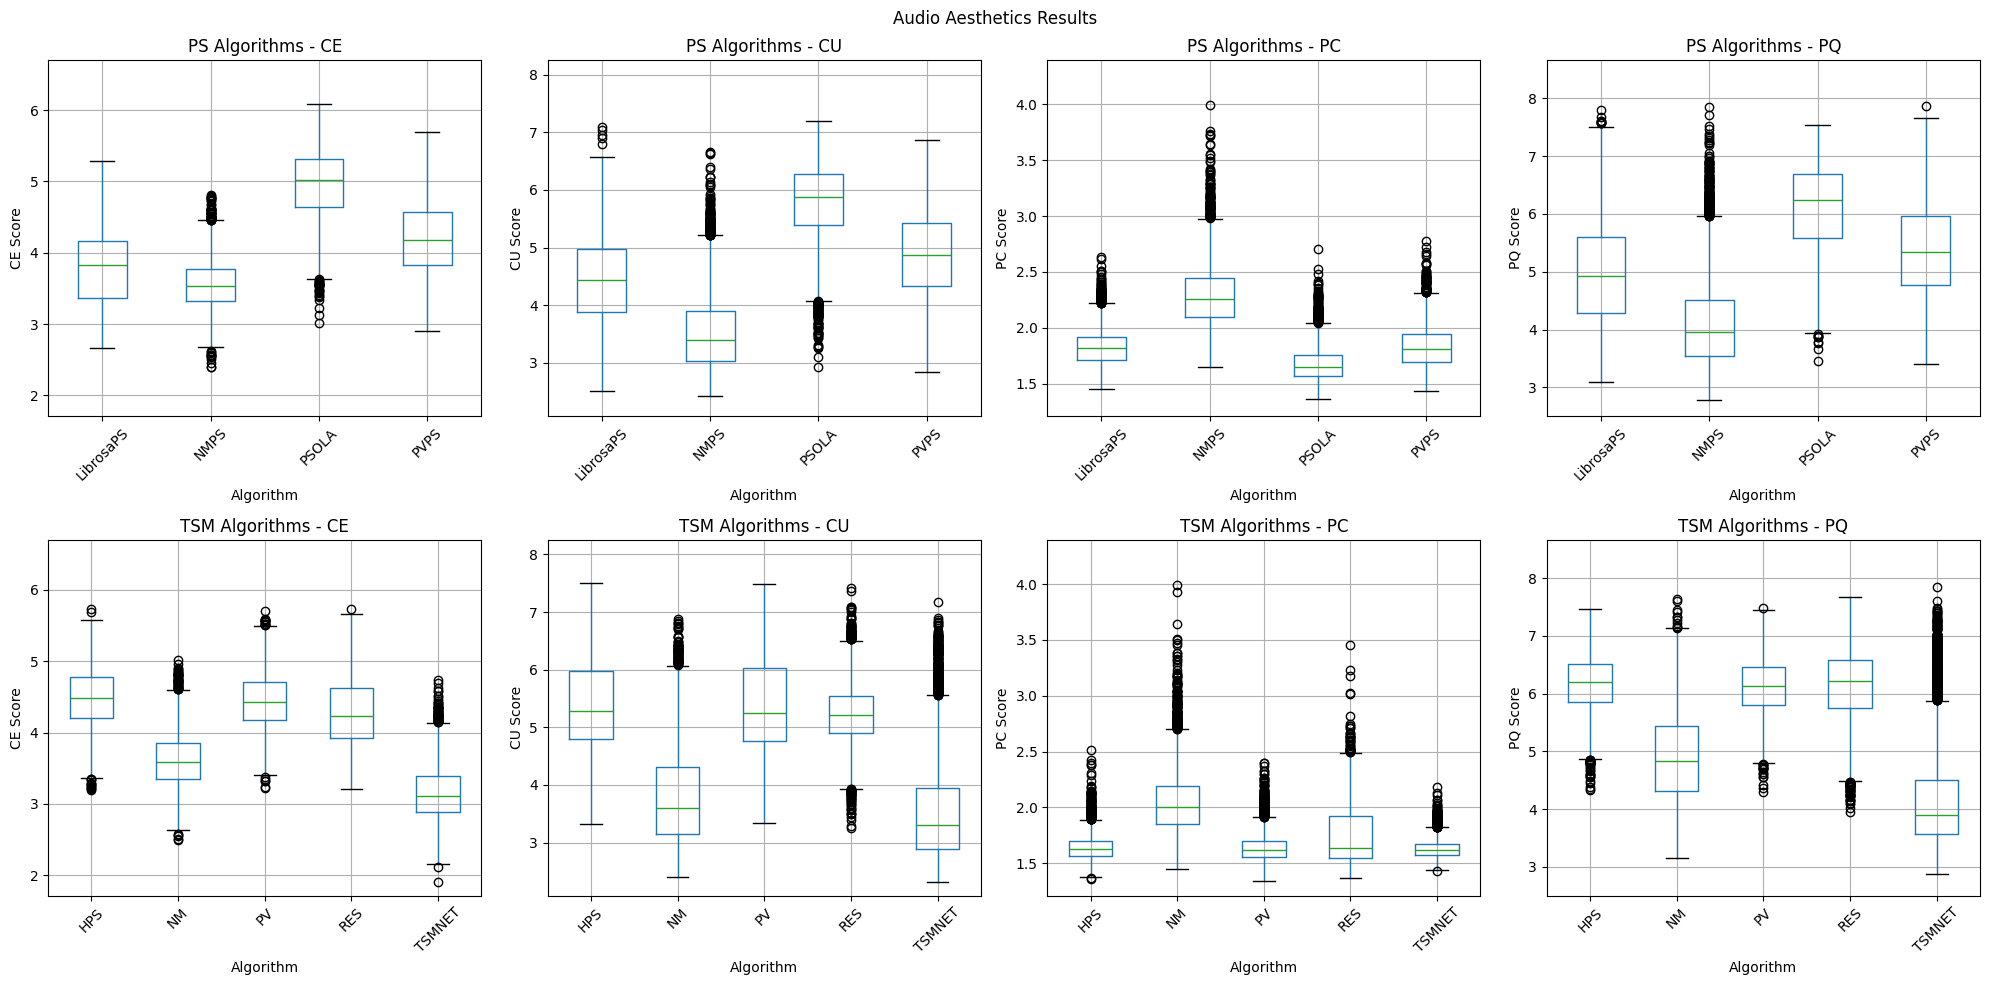

In [12]:
# Calculate global y-axis limits for each metric
metrics = ['CE', 'CU', 'PC', 'PQ']
y_lims = {
    metric: (
        min(df_aa_ps[metric].min(), df_aa_tsm[metric].min()) * 0.9,
        max(df_aa_ps[metric].max(), df_aa_tsm[metric].max()) * 1.1
    )
    for metric in metrics
}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Boxplots for df_ps
df_aa_ps.boxplot(by='algo', column=metrics, rot=45, ax=axes[0])
for ax, metric in zip(axes[0], metrics):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(y_lims[metric])

# Boxplots for df_tsm
df_aa_tsm.boxplot(by='algo', column=metrics, rot=45, ax=axes[1])
for ax, metric in zip(axes[1], metrics):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(y_lims[metric])

# Set the main title
fig.suptitle("Audio Aesthetics Results")

plt.tight_layout()
plt.show()

### VISQOL

In [13]:
df_visqol = get_dataframe_csv_no_header("evaluation/objective/visqol/*.csv")
df_visqol.columns = ['input_path', 'output_path', 'score']

df_visqol['type'] = df_visqol['output_path'].apply(lambda x: x.split('/')[4])
df_visqol['algo'] = df_visqol['output_path'].apply(lambda x: x.split('/')[5])
df_visqol['factor'] = df_visqol['output_path'].apply(lambda x: x.split('/')[6])

df_visqol_ps, df_visqol_tsm = split_dataframe(df_visqol)
df_visqol_ps

,input_path,output_path,score,type,algo,factor
0,/data/input/wav16/p225/p225_315.wav,/data/output/wav16/ps/NMPS/rt_down/p225/p225_3...,2.440720,ps,NMPS,rt_down
1,/data/input/wav16/p225/p225_293.wav,/data/output/wav16/ps/NMPS/rt_down/p225/p225_2...,2.436506,ps,NMPS,rt_down
2,/data/input/wav16/p225/p225_018.wav,/data/output/wav16/ps/NMPS/rt_down/p225/p225_0...,2.435463,ps,NMPS,rt_down
3,/data/input/wav16/p225/p225_071.wav,/data/output/wav16/ps/NMPS/rt_down/p225/p225_0...,2.437389,ps,NMPS,rt_down
4,/data/input/wav16/p225/p225_324.wav,/data/output/wav16/ps/NMPS/rt_down/p225/p225_3...,2.436035,ps,NMPS,rt_down
...,...,...,...,...,...,...
16939,/data/input/wav16/p230/p230_366.wav,/data/output/wav16/ps/LibrosaPS/rt_down/p230/p...,2.487868,ps,LibrosaPS,rt_down
16940,/data/input/wav16/p230/p230_263.wav,/data/output/wav16/ps/LibrosaPS/rt_down/p230/p...,2.503077,ps,LibrosaPS,rt_down
16941,/data/input/wav16/p230/p230_139.wav,/data/output/wav16/ps/LibrosaPS/rt_down/p230/p...,2.508588,ps,LibrosaPS,rt_down
16942,/data/input/wav16/p230/p230_027.wav,/data/output/wav16/ps/LibrosaPS/rt_down/p230/p...,2.600742,ps,LibrosaPS,rt_down


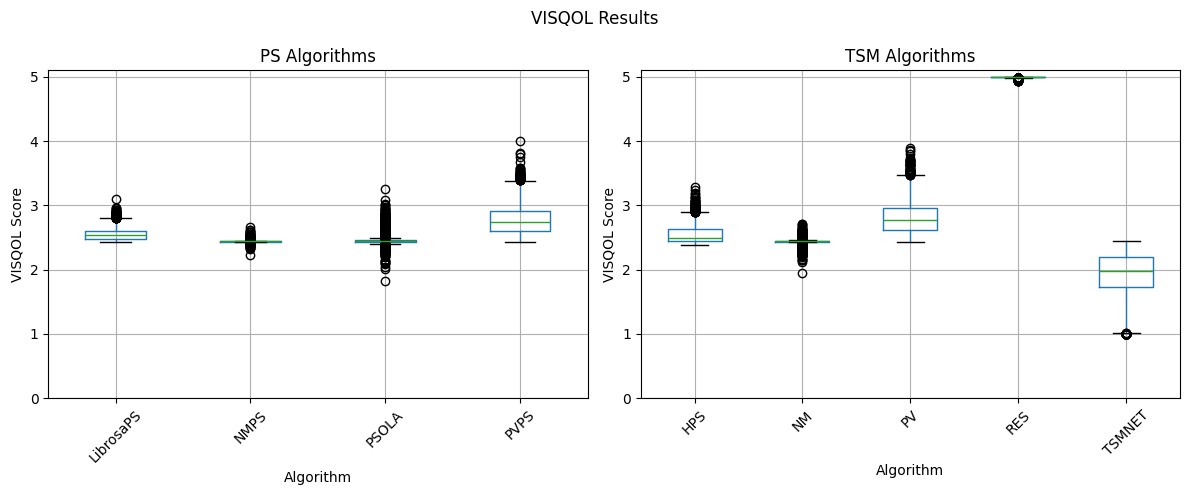

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_visqol_ps.boxplot(by='algo', column='score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('VISQOL Score')
axes[0].set_ylim(0., 5.1)

# Boxplot for df_tsm
df_visqol_tsm.boxplot(by='algo', column='score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('VISQOL Score')
axes[1].set_ylim(0., 5.1)

# Set the main title
fig.suptitle("VISQOL Results")

plt.tight_layout()
plt.show()